In [4]:
from collections import Counter
from math import log

import numpy
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from Utility.Get_dataset_clean_function import upload_data_in_blob, download_data_from_blob

In [14]:
def get_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(classification_report(y_test, y_pred))

In [5]:
df = download_data_from_blob('data_for_model_2022.csv','filestorage')
df

,Unnamed: 0,date_mutation,code_postal,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,valeur_fonciere,longitude,latitude,...,SQ,CRS,VOIE,CR,RLE,Vente,Echange,Vente en l'état futur d'achèvement,Vente terrain à bâtir,Adjudication
0,0,1.641254e+09,75018.0,2,61.00,2.0,0.0,580000.0,2.348168,48.884490,...,0,0,0,0,0,2,0,0,0,0
1,1,1.641427e+09,75003.0,1,40.66,3.0,0.0,605000.0,2.362871,48.863374,...,0,0,0,0,0,1,0,0,0,0
2,2,1.641341e+09,75009.0,3,66.26,3.0,0.0,716250.0,2.332324,48.880353,...,0,0,0,0,0,1,0,0,0,0
3,3,1.641341e+09,75010.0,2,35.19,2.0,0.0,320000.0,2.362613,48.879658,...,0,0,0,0,0,1,0,0,0,0
4,4,1.641514e+09,75020.0,2,32.52,1.0,0.0,320000.0,2.405513,48.872782,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35602,35602,1.672186e+09,75006.0,1,90.00,3.0,0.0,213000.0,2.321291,48.845167,...,0,0,0,0,0,1,0,0,0,0
35603,35603,1.672272e+09,75016.0,3,154.75,6.0,0.0,1650000.0,2.277899,48.859662,...,0,0,0,0,0,1,0,0,0,0
35604,35604,1.667434e+09,75015.0,1,35.00,2.0,0.0,291000.0,2.301128,48.836261,...,0,0,0,0,0,0,0,0,0,1
35605,35605,1.671754e+09,75016.0,2,58.00,2.0,0.0,934000.0,2.275685,48.869823,...,0,0,0,0,0,0,1,0,0,0


In [7]:
lkm = df[[
    'code_postal',
    'nombre_lots',
    'surface_reelle_bati',
    'nombre_pieces_principales',
    'surface_terrain',
    'valeur_fonciere',
    'longitude', 'latitude',
    'Appartement',
    'Maison',
    'RUE',
    'AV',
    'BD',
    'CITE',
    'OTHER',
    'PL',
    'IMP',
    'ALL',
    'QUAI',
    'VC',
    'SQ',
    'CRS',
    'VOIE',
    'CR',
    'RLE'
]]

In [5]:
lkm.shape

(35607, 25)

In [8]:
lkm['log_val'] = lkm.loc[:, 'valeur_fonciere'].apply(lambda x: log(x))

C:\Users\dargo\AppData\Local\Temp\ipykernel_14400\3352471365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lkm['log_val'] = lkm.loc[:, 'valeur_fonciere'].apply(lambda x: log(x))


In [7]:
lkm['log_val'].describe()

count    35607.000000
mean        13.131284
std          0.772460
min         11.512925
25%         12.611538
50%         13.060488
75%         13.573439
max         20.222738
Name: log_val, dtype: float64

In [9]:
lkm.loc[lkm['log_val'] <= 12.611538, 'log_class'] = 0
lkm.loc[(lkm['log_val'] > 12.611538) & (lkm['log_val'] <= 13.060488), 'log_class'] = 1
lkm.loc[(lkm['log_val'] > 13.060488) & (lkm['log_val'] <= 13.573439), 'log_class'] = 2
lkm.loc[(lkm['log_val'] > 13.573439), 'log_class'] = 3

C:\Users\dargo\AppData\Local\Temp\ipykernel_14400\2527217532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lkm.loc[lkm['log_val'] <= 12.611538, 'log_class'] = 0


In [10]:
X = lkm.drop(labels=['valeur_fonciere', 'log_val', 'log_class'], axis=1)
Y = lkm['log_class']

In [10]:
Counter(Y)

Counter({2.0: 8874, 1.0: 8755, 0.0: 9092, 3.0: 8886})

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

In [15]:
forest = RandomForestClassifier(n_estimators=1000,  # Number of trees
                                max_features=2,  # Num features considered
                                bootstrap=False)
forest.fit(X_train, Y_train)
Y_pred = forest.predict(X_test)
get_confusion_matrix(Y_pred, Y_test)

C:\Users\dargo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\dargo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\dargo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

[[2151  388   42   24]
 [ 447 1803  356   27]
 [  75  419 1858  323]
 [  57   60  336 2317]]
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      2605
         1.0       0.68      0.68      0.68      2633
         2.0       0.72      0.69      0.71      2675
         3.0       0.86      0.84      0.85      2770

    accuracy                           0.76     10683
   macro avg       0.76      0.76      0.76     10683
weighted avg       0.76      0.76      0.76     10683


In [13]:
le = pd.read_json('../Utility/test.json', orient='index', )
le.T

FileNotFoundError: File ../Utility/test.json does not exist

C:\Users\dargo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\dargo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\dargo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

Feature ranking:
1. feature surface_reelle_bati (0.478193)
2. feature nombre_pieces_principales (0.142587)
3. feature longitude (0.127847)
4. feature latitude (0.126262)
5. feature code_postal (0.050439)
6. feature nombre_lots (0.028767)
7. feature RUE (0.012107)
8. feature Appartement (0.010866)
9. feature AV (0.004704)
10. feature BD (0.004200)
11. feature surface_terrain (0.003886)
12. feature OTHER (0.002373)
13. feature PL (0.001576)
14. feature QUAI (0.001389)
15. feature Maison (0.001160)
16. feature SQ (0.001141)
17. feature CITE (0.000781)
18. feature IMP (0.000762)
19. feature ALL (0.000366)
20. feature CRS (0.000304)
21. feature VC (0.000233)
22. feature RLE (0.000044)
23. feature CR (0.000008)
24. feature VOIE (0.000006)


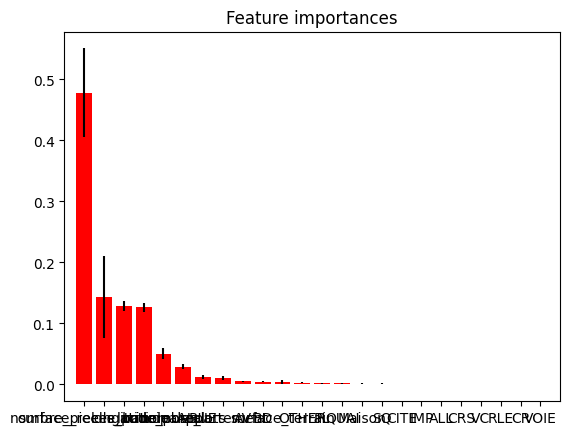

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

importances = forest.feature_importances_
std = numpy.std([tree.feature_importances_ for tree in forest.estimators_],
                axis=0)
indices = numpy.argsort(importances)[::-1]

#Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [16]:
import pickle
from Utility import Get_dataset_clean_function

test = pickle.dumps(forest)
upload_data_in_blob(test,2022,'modelstorage')